In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/asl_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/asl_data/sign_mnist_train.csv
data/asl_data/sign_mnist_valid.csv


In [2]:
df = pd.read_csv('data/trump_insult_tweets_2014_to_2021.csv')
df

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


In [3]:
tweets = df['tweet']
tweets

0        Can you believe this fool, Dr. Thomas Frieden ...
1        Can you believe this fool, Dr. Thomas Frieden ...
2        Big time in U.S. today - MAKE AMERICA GREAT AG...
3        Politician @SenatorCardin didn't like that I s...
4        For the nonbeliever, here is a photo of @Neily...
                               ...                        
10355    If Vice President @Mike_Pence comes through fo...
10356    States want to correct their votes, which they...
10357    They just happened to find 50,000 ballots late...
10358    The States want to redo their votes. They foun...
10359    Sleepy Eyes Chuck Todd is so happy with the fa...
Name: tweet, Length: 10360, dtype: object

In [4]:
print(tweets.shape)
tweets.dropna(inplace=True)
print(tweets.shape)
tweets.drop_duplicates(inplace=True)
print(tweets.shape)
tweets.describe()

(10360,)
(10360,)
(5673,)


count                                                  5673
unique                                                 5673
top       Our Justice Department must not let Awan & Deb...
freq                                                      1
Name: tweet, dtype: object

<AxesSubplot:>

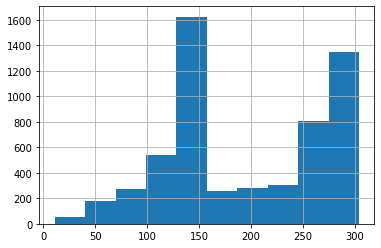

In [5]:
tweets.map(len).hist()

In [6]:
import re

tweets = tweets.tolist()

for i in range(len(tweets)):
    tweets[i] = tweets[i].lower()
    tweets[i] = re.sub(r'http\S+', '', tweets[i]) #usuwanie linkow

In [7]:
chars = sorted(list(set(''.join(tweets))))

print('Unique Chars:', len(chars))

Unique Chars: 95


In [8]:
print('Chars: ', chars)

Chars:  ['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '=', '?', '@', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '\x8f', '\x9d', '\xa0', '¡', '¦', 'µ', '·', '¸', 'º', '½', '¿', 'â', 'ä', 'é', 'ï', 'ð', 'ô', 'ö', 'ù', 'ú', 'ÿ', 'œ', 'ž', '˜', '–', '—', '‘', '’', '‚', '“', '”', '‡', '…', '€', '😉', '😧']


In [9]:
chars_diff = chars[16:-38]
chars_diff.remove("=")
chars_diff.remove("@")
chars_diff.append(' ')
chars_diff.append("!")
chars_diff.append(",")
chars_diff.append(".")
chars_diff

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '?',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ',
 '!',
 ',',
 '.']

In [10]:
for i in chars_diff:
    chars.remove(i)

for i in range(len(tweets)):
    for c in chars:
        tweets[i] = tweets[i].replace(c,'')

In [11]:
chars = sorted(list(set(''.join(tweets))))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print('Chars: ', chars, '\nLength: ', len(chars))

Chars:  [' ', '!', ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] 
Length:  43


In [12]:
text = []

for i in range(len(tweets)):
    text.append(''.join(map(str,[*tweets[i]])))

text = ''.join(text)
print("Length: ", len(text))

Length:  1053641


In [13]:
SEQUENCE_LENGTH = 50
Step_Size = 4
sentences = []
next_chars = []

for i in range(0, len(text) - SEQUENCE_LENGTH, Step_Size):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])

sentences[0]

'can you believe this fool, dr. thomas frieden of c'

In [14]:
predictors = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
labels = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        predictors[i, t, char_indices[char]] = 1
    labels[i, char_indices[next_chars[i]]] = 1

print(predictors.shape, labels.shape)

(263398, 50, 43) (263398, 43)


In [15]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


EPOCHS = 30


model = Sequential()
model.add(LSTM(len(chars) * 2, input_shape=(SEQUENCE_LENGTH, len(chars)), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(len(chars) * 10,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(len(chars) * 10))
model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))
'''
model.add(BatchNormalization())

model.add(Dropout(0.1))

'''

'\nmodel.add(BatchNormalization())\n\nmodel.add(Dropout(0.1))\n\n'

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 86)            44720     
_________________________________________________________________
dropout (Dropout)            (None, 50, 86)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 430)           889240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 430)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 430)               1480920   
_________________________________________________________________
dropout_2 (Dropout)          (None, 430)               0         
_________________________________________________________________
dense (Dense)                (None, 43)                1

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(predictors, labels, validation_split=0.2, batch_size=47, verbose=1, epochs=EPOCHS)

Epoch 1/30
4484/4484 [==============================] - 101s 23ms/step - loss: 2.1889 - accuracy: 0.3651 - val_loss: 1.7389 - val_accuracy: 0.4862
Epoch 2/30
4484/4484 [==============================] - 101s 23ms/step - loss: 1.5815 - accuracy: 0.5319 - val_loss: 1.5359 - val_accuracy: 0.5446
Epoch 3/30
4484/4484 [==============================] - 101s 23ms/step - loss: 1.4170 - accuracy: 0.5783 - val_loss: 1.4610 - val_accuracy: 0.5710
Epoch 4/30
4484/4484 [==============================] - 101s 23ms/step - loss: 1.3282 - accuracy: 0.6002 - val_loss: 1.4336 - val_accuracy: 0.5776
Epoch 5/30
4484/4484 [==============================] - 101s 23ms/step - loss: 1.2664 - accuracy: 0.6166 - val_loss: 1.4167 - val_accuracy: 0.5849
Epoch 6/30
4484/4484 [==============================] - 101s 23ms/step - loss: 1.2215 - accuracy: 0.6286 - val_loss: 1.4181 - val_accuracy: 0.5893
Epoch 7/30
4484/4484 [==============================] - 102s 23ms/step - loss: 1.1827 - accuracy: 0.6392 - val_loss: 1

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b-o', label='Training acc')
plt.plot(epochs, val_acc, 'r--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()

plt.plot(epochs, loss, 'b-o', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

In [ ]:
import heapq


def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)


def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
    
    return x

In [ ]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion


def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]


In [ ]:
def genSentence(text, words = 2):
    textOG = text
    text = text.lower()
    
    while len(text) < SEQUENCE_LENGTH:
        text = ' ' + text
    
    text = text[-SEQUENCE_LENGTH:]
    
    for i in range(words):
        text = text[-SEQUENCE_LENGTH:]
        pred = predict_completions(text, 2)[0]
        text = text + pred
        textOG = textOG + pred
        pass
    
    return textOG

In [ ]:
print(genSentence("500 ", 10))

In [ ]:
print(genSentence("Hilary ", 10))
print(genSentence("Washington", 10))
print(genSentence("Today in", 10))
print(genSentence("The school",13))
print(genSentence("New York Times", 10))
print(genSentence("Make", 10))
print(genSentence("America", 10))